# Region of interest isolation

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 395.5, 282.5, -0.5)

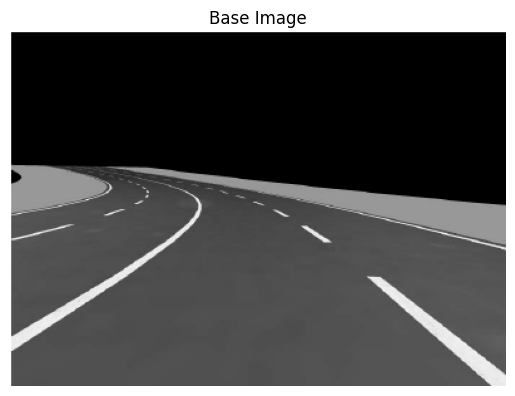

In [2]:
# Load the image
image_path: str = "../../images/lane-detection-test-image.png"
image = cv2.imread(image_path)
plt.imshow(image)
plt.title("Base Image")
plt.axis("off")

In [3]:
# Define the vertices of the ROI polygon
height, width = image.shape[:2]
bottom_left_xy = (0, height)
very_top_of_image = 0
center_of_image = width // 2
top_center_xy = (center_of_image, very_top_of_image)
bottom_right_xy = (width, height)
roi_vertices = np.array(
    [[bottom_left_xy, top_center_xy, bottom_right_xy]], dtype=np.int32
)

(-0.5, 395.5, 282.5, -0.5)

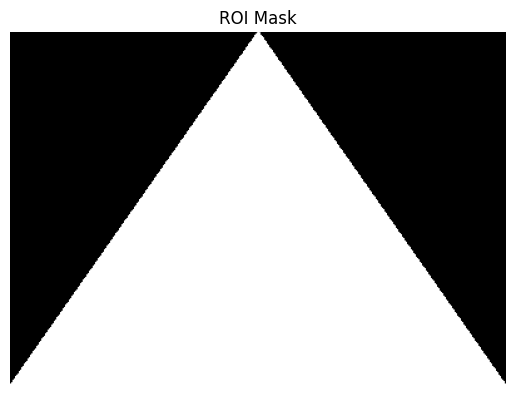

In [4]:
# Create the ROI mask

roi_mask = np.zeros_like(image[:, :, 0], dtype=np.uint8)
cv2.fillPoly(roi_mask, [roi_vertices], 255) # type: ignore

# Display the ROI mask
plt.imshow(roi_mask, cmap='gray')
plt.title('ROI Mask')
plt.axis('off')

In [5]:
image.shape, roi_mask.shape

((283, 396, 3), (283, 396))

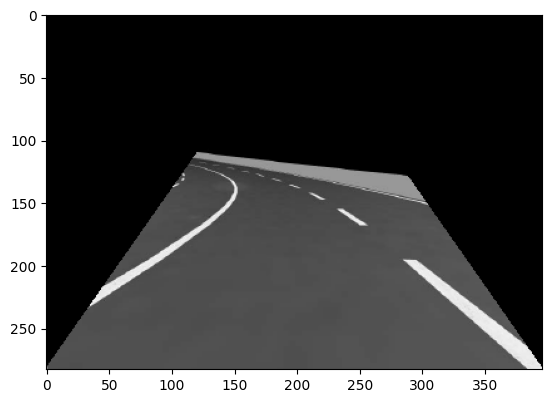

In [6]:
# Apply the ROI mask to the image
roi_image = cv2.bitwise_and(image, image, mask=roi_mask)
plt.imshow(roi_image)
plt.show()